<a href="https://colab.research.google.com/github/Kgs-Mathaba/TimeSeries_with_TensorFlow/blob/main/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# time series forcasting with tensorflow
# predict the price of bitcion
# data collected from coindesk in csv format

In [ ]:
# Download Bitcoin historical data from GitHub 
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2022-01-30 01:37:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-01-30 01:37:58 (6.97 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])
df.head(20)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566
2013-10-06,BTC,120.65533,121.33866,121.85216,120.55450
2013-10-07,BTC,121.79500,120.65533,121.99166,120.43199
2013-10-08,BTC,123.03300,121.79500,123.64016,121.35066
2013-10-09,BTC,124.04900,123.03300,124.78350,122.59266


In [ ]:
len(df)

2787

In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


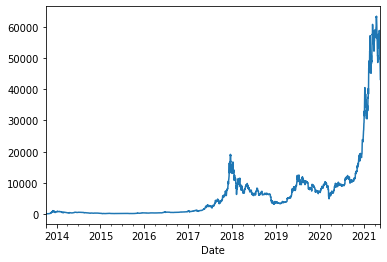

In [ ]:
df['Closing Price (USD)'].plot()

In [ ]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price of bitcoin from 1Oct 2013 to 18 May 2021')

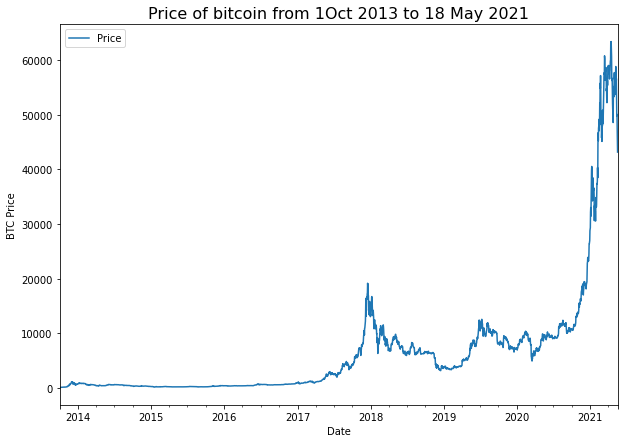

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of bitcoin from 1Oct 2013 to 18 May 2021", fontsize=16)

In [ ]:
## importing time series data with Pyhton's CSV module
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader  = csv.reader(f, delimiter = ",")
  next(csv_reader) #skip first line (header)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) #get the dates as dates not strings
    btc_price.append(float(line[2])) # get closing price as float

#view first 10 of each list
timesteps[:10], btc_price[:10] 


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

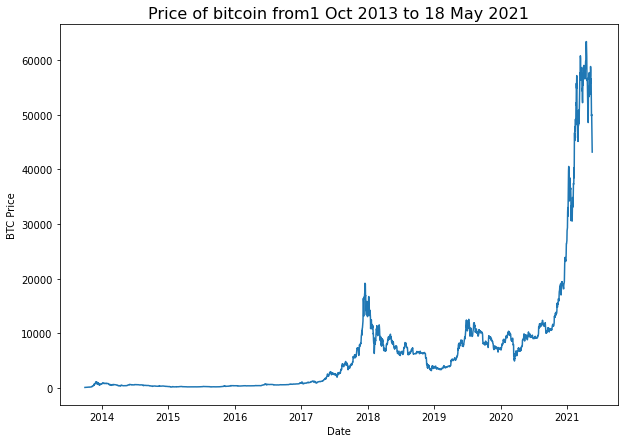

In [ ]:
#Plot from csv
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of bitcoin from1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")

In [ ]:
# Create train and test sets for time series data (The wrong way)
# Get bicoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, 
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

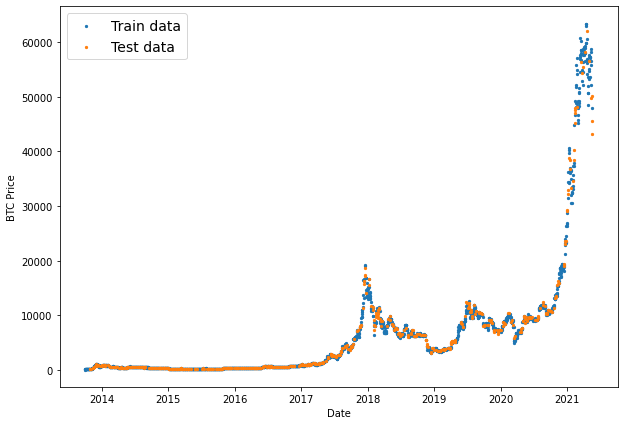

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# create train and test sets for time series (The right way for time series)

split_size = int(0.8 * len(prices)) # 80% train, 20% test

# create train data split
X_train, y_train = timesteps[:split_size], prices[:split_size]

# create test data split
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

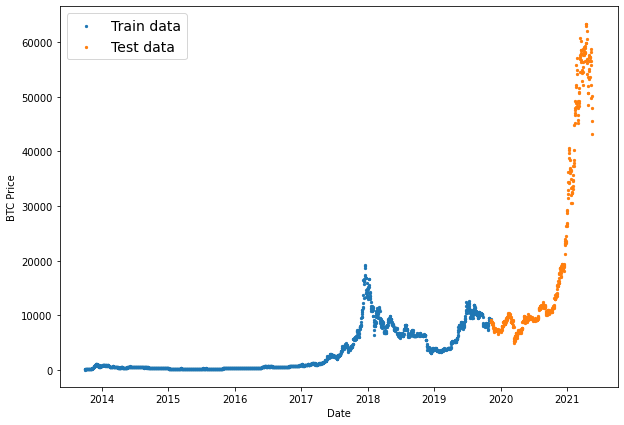

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# create plotting function for time series data

def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps ( a series of points in time) against values ( a series of values across timesteps )

  Parameter
  --------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot ( values will index from start of timesteps)
  end : ewhere to end the plot
  label: label to show on plot about values
  """
  # plot the series
  
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

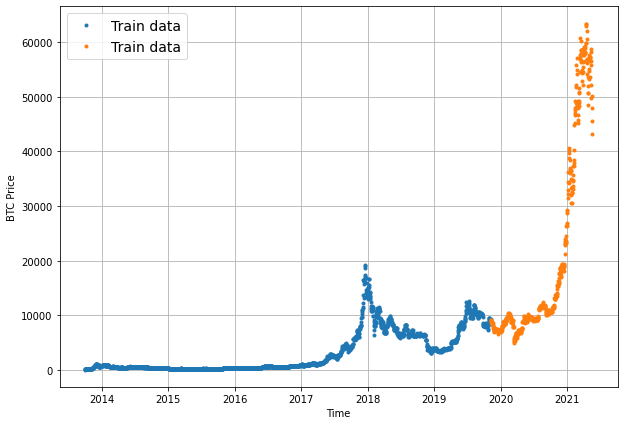

In [ ]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test,  label='Train data')

# Modelling experiments

* ### **Horizon** = number of timesteps into the future we're going to predict
* ### **Window size** = number of timestpes we're going to use to predict

### 0. Baseline Naive model
### 1. Dense 
### 2. Same as dense with diffrent window
### 3. Smae as dense
### 4. Conv1D
### 5. LSTM
### 6. Dense with multivariable data
### 7. N-BEATS 
### 8. Ensemble
### 9. Future prediction
### 10. Dense with turkey data

### Model 0: Naive forecast (Baseline)

###formula $$\hat{y}_{t} = y_{t-1}$$

In [ ]:
#create naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

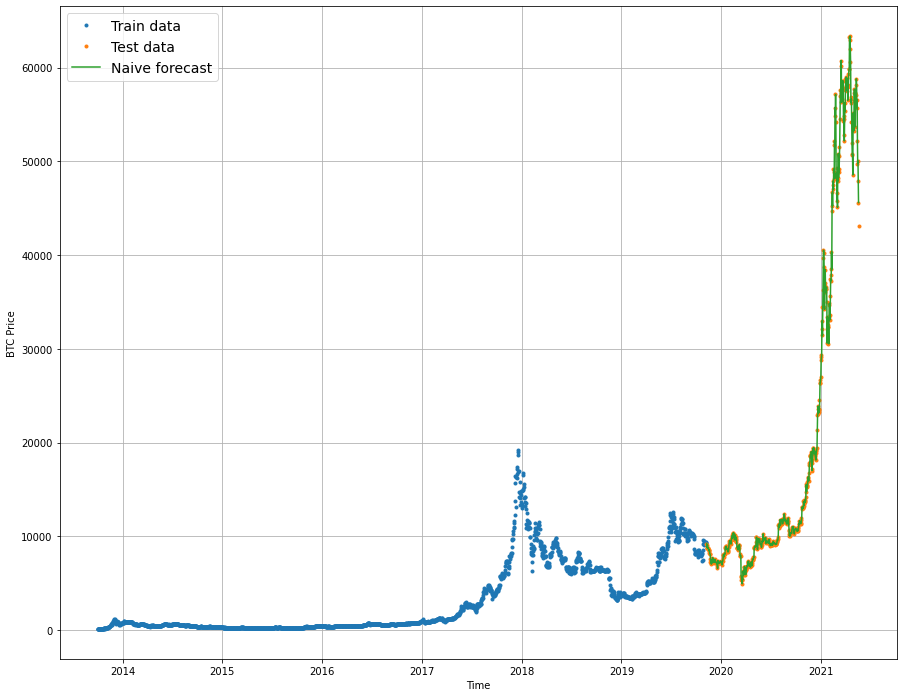

In [ ]:
# Plot naive forecast
plt.figure(figsize=(15,12))
plot_time_series(timesteps=X_train, values = y_train, label="Train data")
plot_time_series(timesteps=X_test, values = y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values = naive_forecast, format="-", label="Naive forecast")

# Evaluation metrics for time series models

* MAE - mean absolute error
* MSE mean squared error
* Huber loss - combination of MAE and MSE
* MASE -  mean absolute scaled error
* sMAPE - (symmewtric) mean absolute percentage error

In [ ]:
import tensorflow as tf

#MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE naive forecast (no seasonality) 
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # seasonality is 1 day (hence shift of 1)

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Creating a function t take in model predictions and truth values and return evaluations
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluations metric
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae" : mae.numpy(),
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "mase" : mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

In [ ]:
## Format Data Part 2 : Windowing the dataset (turning the problem to a supervised problem)
# Example one week window
# [0,1,2,3,4,5,6] -> [7]
# [1,2,3,4,5,6,7] -> [8]
# [2,3,4,5,6,7,8] -> [9]

In [ ]:
# setup global variables ofr window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week to make prediction

In [ ]:
# create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  """
  creates labels for windowed dataset

  E.g. for horizon = 1
  Input: [0,1,2,3,4,5,6,7] -> <output: ([0,1,2,3,4,5,6], [7]
  """
  return x[:, :-horizon], x[:, -horizon:]


In [ ]:
# Test out window function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
a = tf.expand_dims(tf.range(8)+1, axis=0)
a

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [ ]:
a[:, :-1]

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
a[:, -1:]

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>

In [ ]:
btc_price[:20]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116,
 125.27966,
 125.9275,
 126.38333,
 135.24199,
 133.20333,
 142.76333,
 137.92333,
 142.95166,
 152.55183,
 160.33883]

In [ ]:
np.expand_dims(np.arange(8), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [ ]:
 np.expand_dims(np.arange(len(prices[:7])-(6-1)), axis=0).T

array([[0],
       [1]])

In [ ]:
np.expand_dims(np.arange(6), axis=0) 

array([[0, 1, 2, 3, 4, 5]])

In [ ]:
np.expand_dims(np.arange(6), axis=0) + np.expand_dims(np.arange(len(prices[:7])-(6-1)), axis=0).T

array([[0, 1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5, 6]])

In [ ]:
prices[ np.expand_dims(np.arange(6), axis=0) + np.expand_dims(np.arange(len(prices[:7])-(6-1)), axis=0).T]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ]])

In [ ]:
import numpy as np


# Build window function
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """

  Turns a 1d array into a 2d array of sequantial labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Use numpy indexing to create a 2d array of multiple window steps using **broadcasting** (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array if window of size window_size

  #print(f' Window indexes: \n {window_indexes, window_indexes.shape}')

  # 3. Index on the target array (a time series) with 2d array of multiple steps
  windowed_array = x[window_indexes]
  #print(windowed_array)

  # 4. Get labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels


In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# view the first 3 windows/labels
for i in range(3):
  print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]
